# 1 Imports

In [311]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", UserWarning)

# 2 Data Input Pipeline

In [312]:
queries = []
dataframes = []

try:
    db = connection.connect(
        host="localhost",
        database="F1",
        user="root",
        passwd="Hausfahrrad123",
        use_pure=True
    )
    queries.append("SELECT * from circuits;")
    queries.append("SELECT * from constructorresults;")
    queries.append("SELECT * from constructors;")
    queries.append("SELECT * from constructorstandings;")
    queries.append("SELECT * from drivers;")
    queries.append("SELECT * from driverstandings;")
    queries.append("SELECT * from laptimes;")
    queries.append("SELECT * from pitstops;")
    queries.append("SELECT * from qualifying;")
    queries.append("SELECT * from races;")
    queries.append("SELECT * from results;")
    queries.append("SELECT * from seasons;")
    queries.append("SELECT * from sprintresults;")
    queries.append("SELECT * from status;")

    circuits_df = pd.read_sql(queries[0], db)
    constructorresults_df = pd.read_sql(queries[1], db)
    constructors_df = pd.read_sql(queries[2], db)
    constructorstandings_df = pd.read_sql(queries[3], db)
    drivers_df = pd.read_sql(queries[4], db)
    driverstandings_df = pd.read_sql(queries[5], db)
    laptimes_df = pd.read_sql(queries[6], db)
    pitstops_df = pd.read_sql(queries[7], db)
    qualifying_df = pd.read_sql(queries[8], db)
    races_df = pd.read_sql(queries[9], db)
    results_df = pd.read_sql(queries[10], db)
    seasons_df = pd.read_sql(queries[11], db)
    sprintresults_df = pd.read_sql(queries[12], db)
    status_df = pd.read_sql(queries[13], db)

    db.close()

except Exception as e:
    db.close()
    print(str(e))

# 3 Write dataframes to CSV's for convenience

In [313]:
circuits_df.to_csv(
    r'C:\Users\Gabriel\Documents\Code\KEN3450 Data Analysis\Data Madness\Code\CSVs\circuits.csv',
    index=False
)

# 4 Find and fix NaN values

In [314]:
dataframes = [
    circuits_df,
    constructorresults_df,
    constructors_df,
    constructorstandings_df,
    drivers_df,
    driverstandings_df,
    laptimes_df,
    pitstops_df,
    qualifying_df,
    races_df,
    results_df,
    seasons_df,
    sprintresults_df,
    status_df
]

dataframes_names = [
    'circuits_df',
    'constructorresults_df',
    'constructors_df',
    'constructorstandings_df',
    'drivers_df',
    'driverstandings_df',
    'laptimes_df',
    'pitstops_df',
    'qualifying_df',
    'races_df',
    'results_df',
    'seasons_df',
    'sprintresults_df',
    'status_df'
]

In [315]:
def find_nan(data):
    nan_values = data.isna()
    nan_columns = nan_values.any()
    columns_with_nan = data.columns[nan_columns].tolist()
    print(columns_with_nan)

In [316]:
for idx, dataframe in enumerate(dataframes):
    print(dataframes_names[idx])
    find_nan(dataframe)

circuits_df
['alt']
constructorresults_df
['status']
constructors_df
[]
constructorstandings_df
[]
drivers_df
['number', 'code']
driverstandings_df
[]
laptimes_df
[]
pitstops_df
[]
qualifying_df
['q1', 'q2', 'q3']
races_df
['time']
results_df
['number', 'position', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed']
seasons_df
[]
sprintresults_df
['position', 'time', 'milliseconds', 'fastestLap', 'fastestLapTime']
status_df
[]


Circuits, Constructorresults, Drivers, Qualifying, Results and Sprintresults contain NaN values.

## 4.1 Circuits

The Altitudes for Al Dayeen and Miami are missing

In [317]:
circuits_df.loc[circuits_df['alt'].isna()]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,NaN,http://en.wikipedia.org/wiki/Losail_Internatio...
78,79,miami,Miami International Autodrome,Miami,United States,25.9581,-80.2389,NaN,http://en.wikipedia.org/wiki/Miami_Internation...


We could not find the altitude of the Losail International Circuit, but the neighboring city of Doha is at 3m which we're using here. Same goes for the Miami International Autodrome. Here Miami's altitude of 2m was chosen.

In [318]:
circuits_df['alt'] = circuits_df['alt'].replace([np.nan, np.nan], [2,3])

In [319]:
circuits_df.iloc[[77]]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49,51.4542,3.0,http://en.wikipedia.org/wiki/Losail_Internatio...


## 4.2 Constructor Results

In [320]:
len(constructorresults_df)

11950

In [321]:
constructorresults_df.loc[constructorresults_df['status'].isna()]

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,None
1,2,18,2,8.0,None
2,3,18,3,9.0,None
3,4,18,4,5.0,None
4,5,18,5,2.0,None
...,...,...,...,...,...
11945,16445,1073,214,6.0,None
11946,16446,1073,117,0.0,None
11947,16447,1073,210,0.0,None
11948,16448,1073,3,0.0,None


Since 11933 out of the 11950 entries in the status column are 'None', it is safe to drop it!

In [322]:
constructorresults_df = constructorresults_df.drop(columns='status')

## 4.3 Drivers

In [323]:
len(drivers_df)

854

In [324]:
drivers_df.loc[drivers_df['number'].isna()]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,NaN,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,NaN,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
9,10,glock,NaN,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock
...,...,...,...,...,...,...,...,...,...
813,814,resta,NaN,DIR,Paul,di Resta,1986-04-16,British,http://en.wikipedia.org/wiki/Paul_di_Resta
815,816,ambrosio,NaN,DAM,Jérôme,d'Ambrosio,1985-12-27,Belgian,http://en.wikipedia.org/wiki/J%C3%A9r%C3%B4me_...
818,819,pic,NaN,PIC,Charles,Pic,1990-02-15,French,http://en.wikipedia.org/wiki/Charles_Pic
822,823,garde,NaN,VDG,Giedo,van der Garde,1985-04-25,Dutch,http://en.wikipedia.org/wiki/Giedo_van_der_Garde


Once again, 804 out of 854 are NaN, so we drop 'number'.

In [325]:
drivers_df = drivers_df.drop(columns='number')

In [326]:
drivers_df.loc[drivers_df['code'].isna()]

,driverId,driverRef,code,forename,surname,dob,nationality,url
42,43,matta,None,Cristiano,da Matta,1973-09-19,Brazilian,http://en.wikipedia.org/wiki/Cristiano_da_Matta
43,44,panis,None,Olivier,Panis,1966-09-02,French,http://en.wikipedia.org/wiki/Olivier_Panis
44,45,pantano,None,Giorgio,Pantano,1979-02-04,Italian,http://en.wikipedia.org/wiki/Giorgio_Pantano
45,46,bruni,None,Gianmaria,Bruni,1981-05-30,Italian,http://en.wikipedia.org/wiki/Gianmaria_Bruni
46,47,baumgartner,None,Zsolt,Baumgartner,1981-01-01,Hungarian,http://en.wikipedia.org/wiki/Zsolt_Baumgartner
...,...,...,...,...,...,...,...,...
802,802,serafini,None,Dorino,Serafini,1909-07-22,Italian,http://en.wikipedia.org/wiki/Dorino_Serafini
803,803,cantrell,None,Bill,Cantrell,1908-01-31,American,http://en.wikipedia.org/wiki/William_Cantrell
804,804,mantz,None,Johnny,Mantz,1918-09-18,American,http://en.wikipedia.org/wiki/Johnny_Mantz
805,805,kladis,None,Danny,Kladis,1917-02-10,American,http://en.wikipedia.org/wiki/Danny_Kladis


Same reasoning as above, 'code' can be removed!

In [327]:
drivers_df = drivers_df.drop(columns='code')

## 4.4 Qualifying - Work in Progress

In [328]:
len(qualifying_df)

9135

In [329]:
qualifying_df.loc[qualifying_df['q3'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
9,10,18,20,5,15,10,1:26.702,1:25.842,None
10,11,18,22,11,17,11,1:26.369,1:26.173,None
11,12,18,4,4,5,12,1:26.907,1:26.188,None
12,13,18,18,11,16,13,1:26.712,1:26.259,None
13,14,18,6,3,8,14,1:26.891,1:26.413,None
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,None,None
9131,9172,1073,847,3,63,17,1:24.423,None,None
9132,9173,1073,8,51,7,18,1:24.779,None,None
9133,9174,1073,854,210,47,19,1:24.906,None,None


In [330]:
qualifying_df.loc[qualifying_df['q3'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
9,10,18,20,5,15,10,1:26.702,1:25.842,None
10,11,18,22,11,17,11,1:26.369,1:26.173,None
11,12,18,4,4,5,12,1:26.907,1:26.188,None
12,13,18,18,11,16,13,1:26.712,1:26.259,None
13,14,18,6,3,8,14,1:26.891,1:26.413,None
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,None,None
9131,9172,1073,847,3,63,17,1:24.423,None,None
9132,9173,1073,8,51,7,18,1:24.779,None,None
9133,9174,1073,854,210,47,19,1:24.906,None,None


How to deal with the Qualifyings?

## 4.5 Races

In [331]:
len(races_df)

1079

In [332]:
races_df.loc[races_df['time'].isna()]

,raceId,year,round,circuitId,name,date,time,url
89,90,2004,1,1,Australian Grand Prix,2004-03-07,NaT,http://en.wikipedia.org/wiki/2004_Australian_G...
90,91,2004,2,2,Malaysian Grand Prix,2004-03-21,NaT,http://en.wikipedia.org/wiki/2004_Malaysian_Gr...
91,92,2004,3,3,Bahrain Grand Prix,2004-04-04,NaT,http://en.wikipedia.org/wiki/2004_Bahrain_Gran...
92,93,2004,4,21,San Marino Grand Prix,2004-04-25,NaT,http://en.wikipedia.org/wiki/2004_San_Marino_G...
93,94,2004,5,4,Spanish Grand Prix,2004-05-09,NaT,http://en.wikipedia.org/wiki/2004_Spanish_Gran...
...,...,...,...,...,...,...,...,...
834,835,1950,3,19,Indianapolis 500,1950-05-30,NaT,http://en.wikipedia.org/wiki/1950_Indianapolis...
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,NaT,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,NaT,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
837,838,1950,6,55,French Grand Prix,1950-07-02,NaT,http://en.wikipedia.org/wiki/1950_French_Grand...


Reformat into hours

In [333]:
races_df['time'] = races_df['time'].dt.seconds / 3600

Let's examine the missing values in the time column.

In [334]:
races_df['time'].describe()

count    348.000000
mean      12.335728
std        3.440624
min        3.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       20.000000
Name: time, dtype: float64

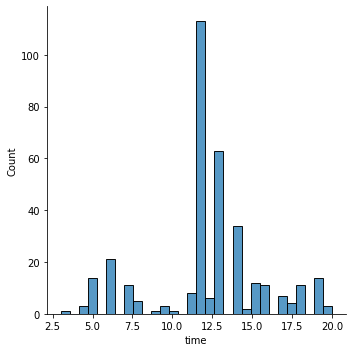

In [335]:
sns.displot(data=races_df['time'])

It seems sensible to replace the NaN values with the mean of the columns since we're going to be using the time to get weather data anyways.

In [336]:
def fix_na(data):
    data['time'] = data['time'].fillna(data['time'].mean())
    data['time'] = data['time']
    return data

In [337]:
races_df = fix_na(races_df)

Realizing that the upcoming races in 2022 are already listed here, we remove those entries.

In [338]:
races_df = races_df.loc[races_df['year'] < 2022]

In [339]:
races_df

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,6.0,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,9.0,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,7.0,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12.0,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12.0,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1053,1069,2021,17,69,United States Grand Prix,2021-10-24,19.0,http://en.wikipedia.org/wiki/2021_United_State...
1054,1070,2021,18,32,Mexico City Grand Prix,2021-11-07,19.0,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1055,1071,2021,19,18,São Paulo Grand Prix,2021-11-14,17.0,http://en.wikipedia.org/wiki/São_Paulo_Grand_Prix
1056,1072,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,17.5,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


## 4.6 Results

In [342]:
len(results_df)

25400

In [354]:
results_df['position'].describe()

count    14613.000000
mean         7.912954
std          4.796383
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         33.000000
Name: position, dtype: float64

In [356]:
results_df.loc[results_df['fastestLap'].isna()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
16,17,18,17,9,10.0,14,NaN,R,17,0.0,0,None,NaN,NaN,NaN,None,None,4
17,18,18,18,11,16.0,12,NaN,R,18,0.0,0,None,NaN,NaN,NaN,None,None,4
18,19,18,19,8,19.0,21,NaN,R,19,0.0,0,None,NaN,NaN,NaN,None,None,4
19,20,18,20,5,15.0,9,NaN,R,20,0.0,0,None,NaN,NaN,NaN,None,None,4
20,21,18,21,10,21.0,16,NaN,R,21,0.0,0,None,NaN,NaN,NaN,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,25205,1063,840,117,18.0,19,20.0,20,20,0.0,1,+44.108,251179.0,NaN,0.0,None,None,1
25239,25245,1065,852,213,22.0,0,NaN,W,20,0.0,0,None,NaN,NaN,0.0,None,None,23
25318,25324,1070,854,210,47.0,14,NaN,R,19,0.0,0,None,NaN,NaN,0.0,None,None,4
25319,25325,1070,852,213,22.0,17,NaN,R,20,0.0,0,None,NaN,NaN,0.0,None,None,4


Since only numererical values make sense to evaluate rankings, all NaN values were dropped. We did not want to average rankings or anything like that as we would risk to significantely falsify the results.

In [362]:
results_df = results_df.dropna(axis=0)

In [363]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25386,25392,1073,846,1,4.0,3,7.0,7,7,6.0,58,+59.200,5476545.0,58.0,4.0,1:26.762,219.123,1
25387,25393,1073,4,214,14.0,11,8.0,8,8,4.0,58,+1:01.708,5479053.0,58.0,8.0,1:27.607,217.010,1
25388,25394,1073,839,214,31.0,9,9.0,9,9,2.0,58,+1:04.026,5481371.0,58.0,10.0,1:28.249,215.431,1
25389,25395,1073,844,6,16.0,7,10.0,10,10,1.0,58,+1:06.057,5483402.0,40.0,12.0,1:28.433,214.983,1


## 4.7 Sprintresults - Work in Progress, might drop because very new

In [368]:
len(sprintresults_df)

60

In [372]:
sprintresults_df.loc[sprintresults_df['fastestLapTime'].isna()]

,sprintResultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
39,40,1065,842,213,10,20,NaN,R,20,0.0,0,None,NaN,NaN,None,3


# 5 Create Location and Date dataframes to include weather data

In [373]:
location = circuits_df[['location', 'lat', 'lng', 'alt']]
dates = races_df[['date', 'time']]